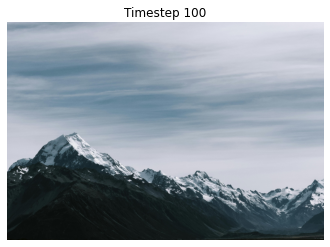

In [8]:
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt


# Define parameters
beta1 = 0.01  # Example value for beta1
beta2 = 0.99  # Example value for beta2
timesteps = 100  # Number of timesteps

# Construct b_t, a_t, and ab_t
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

b_t = (beta2 - beta1) * torch.linspace(0, 1, timesteps + 1, device=device) + beta1
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp().to(device)  # Move ab_t to the same device
ab_t[0] = 1.0  # Ensure the initial value is 1.0 (100% of the original image)


image_path = 'pexels-lastly-772803.jpg'  # Replace with your image path
img = Image.open(image_path)  
img = img.convert('RGB')  
img_array = np.array(img)

img_array = img_array / 255.0  # Normalize to [0, 1]
img_tensor = torch.tensor(img_array, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)  # Convert to tensor and add batch dimension, move to device

plt.imshow(np.clip(img_array, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Timestep {100}")
plt.axis('off')
plt.show()




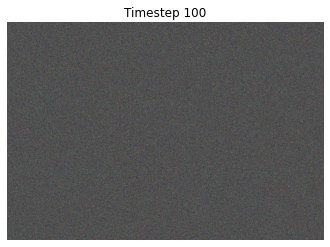

In [9]:
noise = torch.randn_like(img_tensor, device=device)
encrypted_image = ab_t.sqrt()[100, None, None, None] * img_tensor + (1 - ab_t[100, None, None, None]).sqrt() * noise

encrypted_image = encrypted_image.squeeze().permute(1, 2, 0).cpu().numpy()  # Convert back to HWC format for visualization

plt.imshow(np.clip(encrypted_image, 0, 1))  # Ensure values are in [0, 1]
plt.title(f"Timestep {100}")
plt.axis('off')
plt.savefig('encrypted_image.png')  # Save the image
plt.show()


In [13]:
x_t = encrypted_image
for t in range(100,-1, -1):
    x_t_minus_1 = (x_t - np.sqrt(1 - a_t[t]) * noise.cpu().numpy()) / np.sqrt(a_t)
    
    x_t = x_t_minus_1

    plt.imshow(np.clip(x_t, 0, 1))  # Ensure values are in [0, 1]
    plt.axis('off')
    plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

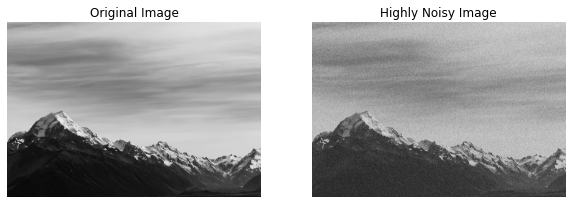

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'pexels-lastly-772803.jpg'  # Your image path
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image, dtype=np.float32)

# Generate Gaussian noise parameters
mean = 0
std_dev = 10
num_iterations = 100

# Create a copy of the original image array to add noise repeatedly
noisy_image_array = image_array.copy()

# Add Gaussian noise repeatedly
for _ in range(num_iterations):
    gaussian_noise = np.random.normal(mean, std_dev, image_array.shape)
    noisy_image_array += gaussian_noise

# Clip the values to be in the valid range for image data and convert back to uint8
noisy_image_array = np.clip(noisy_image_array, 0, 255).astype(np.uint8)

# Convert array back to image
noisy_image = Image.fromarray(noisy_image_array)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Highly Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.show()


In [17]:
import torch

# Set your parameters
timesteps = 1000  # Example value, set according to your needs
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define b_t as a constant tensor
b_t = torch.linspace(0, 1, timesteps + 1, device=device)

# Ensure b_t is constant by setting requires_grad to False
b_t.requires_grad_(False)

print(b_t)


tensor([0.0000, 0.0010, 0.0020,  ..., 0.9980, 0.9990, 1.0000], device='cuda:0')
